# Clustering Mall Customers

_**Importing the required libraries & packages**_

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import ydata_profiling as pf
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.cluster import KMeans
import warnings 
warnings.filterwarnings('ignore')
import pickle

_**Changing the default working directory path&Reading the Dataset using Pandas Command**_

In [2]:
os.chdir('C:\\Users\\mural\\Documents\\Batch 74 Day 18')
df=pd.read_csv('Mall_Customers.csv')

_**Automated Exploratory Data Analysis(EDA) with ydata_profiling(pandas_profiling)**_

In [3]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

_**Checking the Null Values of all the Columns in the Dataset**_

In [4]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

_**Assigning the independent variable since it is Clustering Model there's no dependent variable.**_

In [5]:
x=df.iloc[:,[3,4]].values

_**Finding the WCSS(within cluster sum of square) values using KMeans CLsutering Model.**_

In [6]:
wcss=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
display(wcss)

[181363.59595959593,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25029.253424935887,
 21850.165282585633,
 19653.383606248826]

_**Plotting the Line Graph with WCSS values to get the exact ideal number of clusters to be created using KMeans Clsutering Algorithm and saving the PNG file of the graph>**_

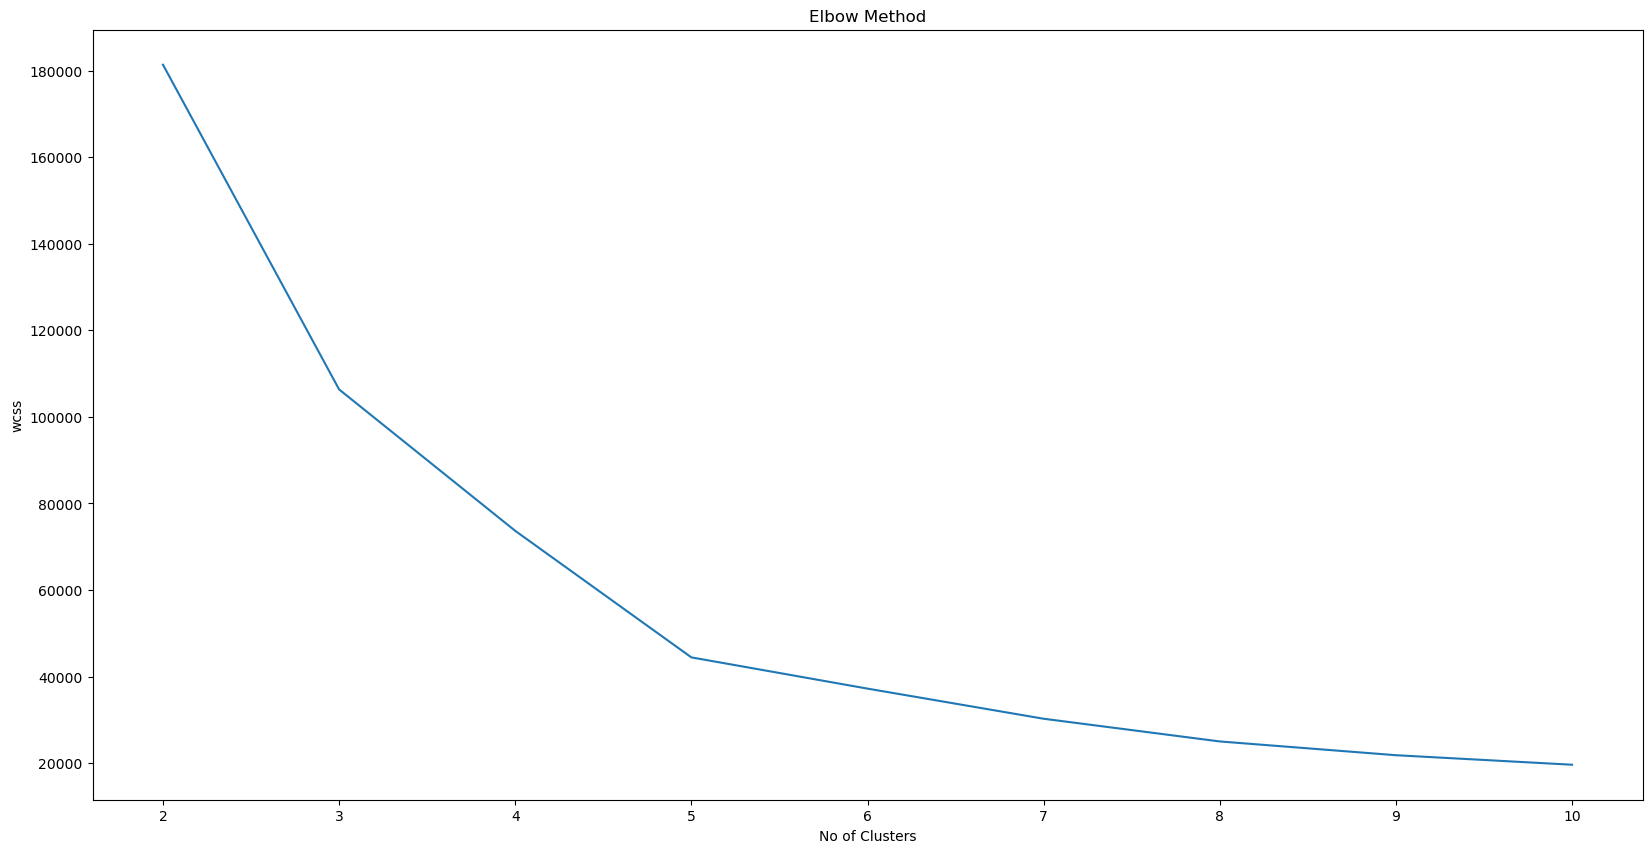

In [7]:
plt.rcParams['figure.figsize']=(20,10)
plt.plot(range(2,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.savefig('Elbow Method.png')
plt.show()

_**Fitting the KMeans Clustering model with the ideal number of clusters found from Elbow Method Graph and getting the dataset belonging to the cluster.**_

In [8]:
kmeans =  KMeans (n_clusters =  5 , init = 'k-means++')
kmeans = kmeans.fit(x)
y_kmeans = kmeans.labels_
display (y_kmeans)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

_**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**_

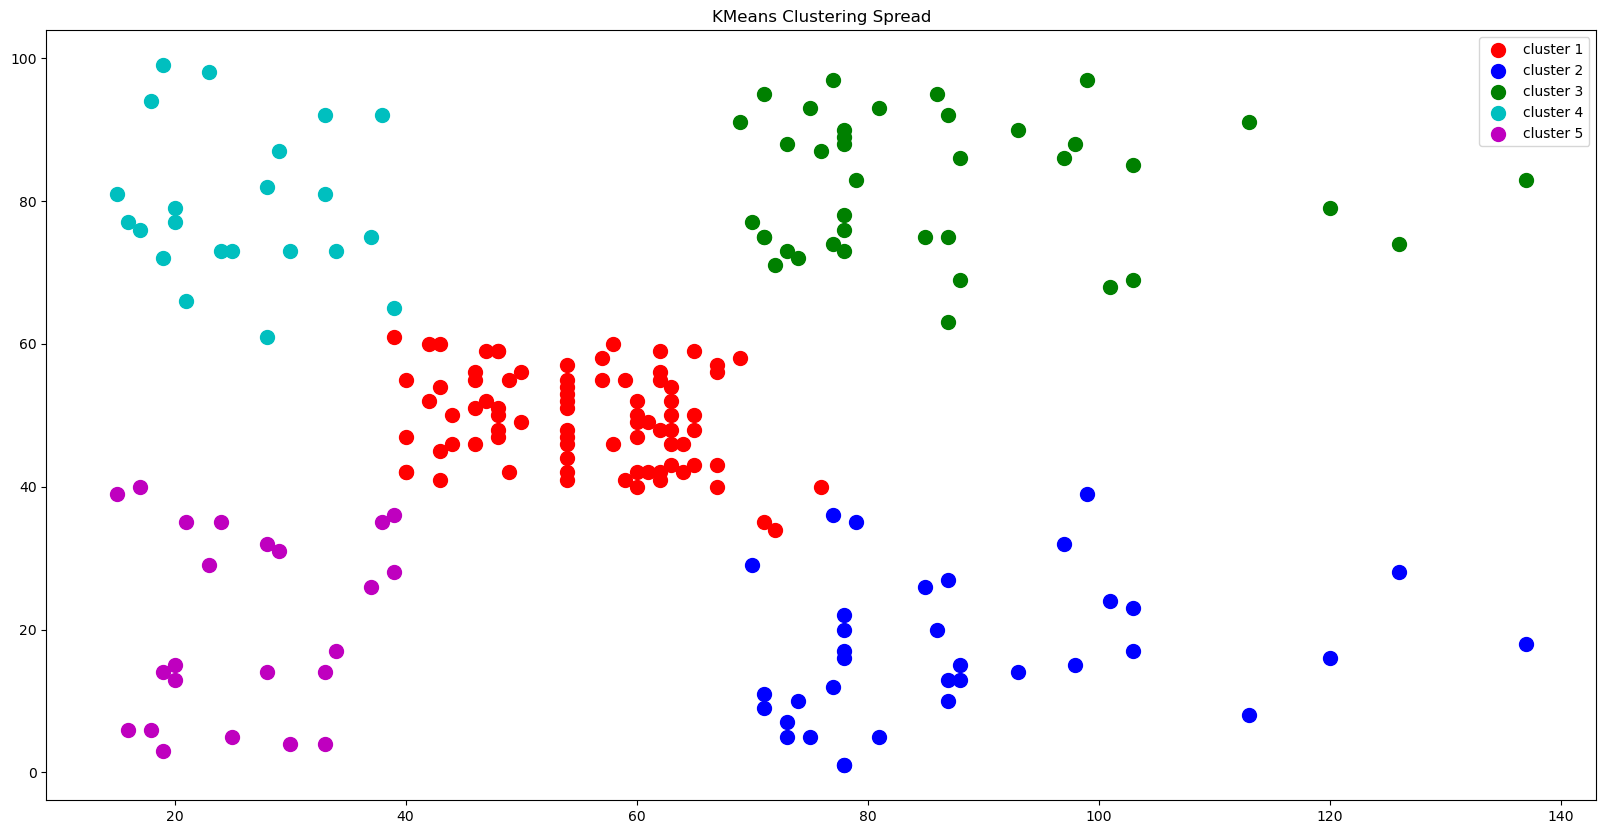

In [9]:

plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='r',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='b',label='cluster 2')
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],s=100,c='g',label='cluster 3')
plt.scatter(x[y_kmeans==3,0],x[y_kmeans==3,1],s=100,c='c',label='cluster 4')
plt.scatter(x[y_kmeans==4,0],x[y_kmeans==4,1],s=100,c='m',label='cluster 5')
plt.title('KMeans Clustering Spread')
plt.savefig('kmeans Clustering Spread Graph.png')
plt.legend()
plt.show()

_**Merging the Cluster Number and adding the seperate column for it with Original Dataset and displaying the resulting dataset**_

In [10]:
result=pd.concat([df,pd.DataFrame(y_kmeans,columns=['Cluster Number'])],axis=1)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


_**Grouping By the Clsuter Number to see the number of values in each Clsuters**_

In [11]:
result.groupby('Cluster Number').size()

Cluster Number
0    81
1    35
2    39
3    22
4    23
dtype: int64

_**Grouping By the clsuter number with respect to Annual Income and Spending to get the Minimum,Maximum values of Annual Income and Spending score for each cluster.**_

In [12]:
result.groupby(['Cluster Number']).agg({'Annual Income (k$)':[np.max,np.min],'Spending Score (1-100)':[np.max,np.min]})

Annual Income (k$)      Spending Score (1-100)     
                             amax amin                   amax amin
Cluster Number                                                    
0                              76   39                     61   34
1                             137   70                     39    1
2                             137   69                     97   63
3                              39   15                     99   61
4                              39   15                     40    3

_**Plotting the Dendrogram Graph with Ward Methods to find out the exact ideal number of clusters to be created using Agglomerative Clsutering model and saving the PNG file.**_

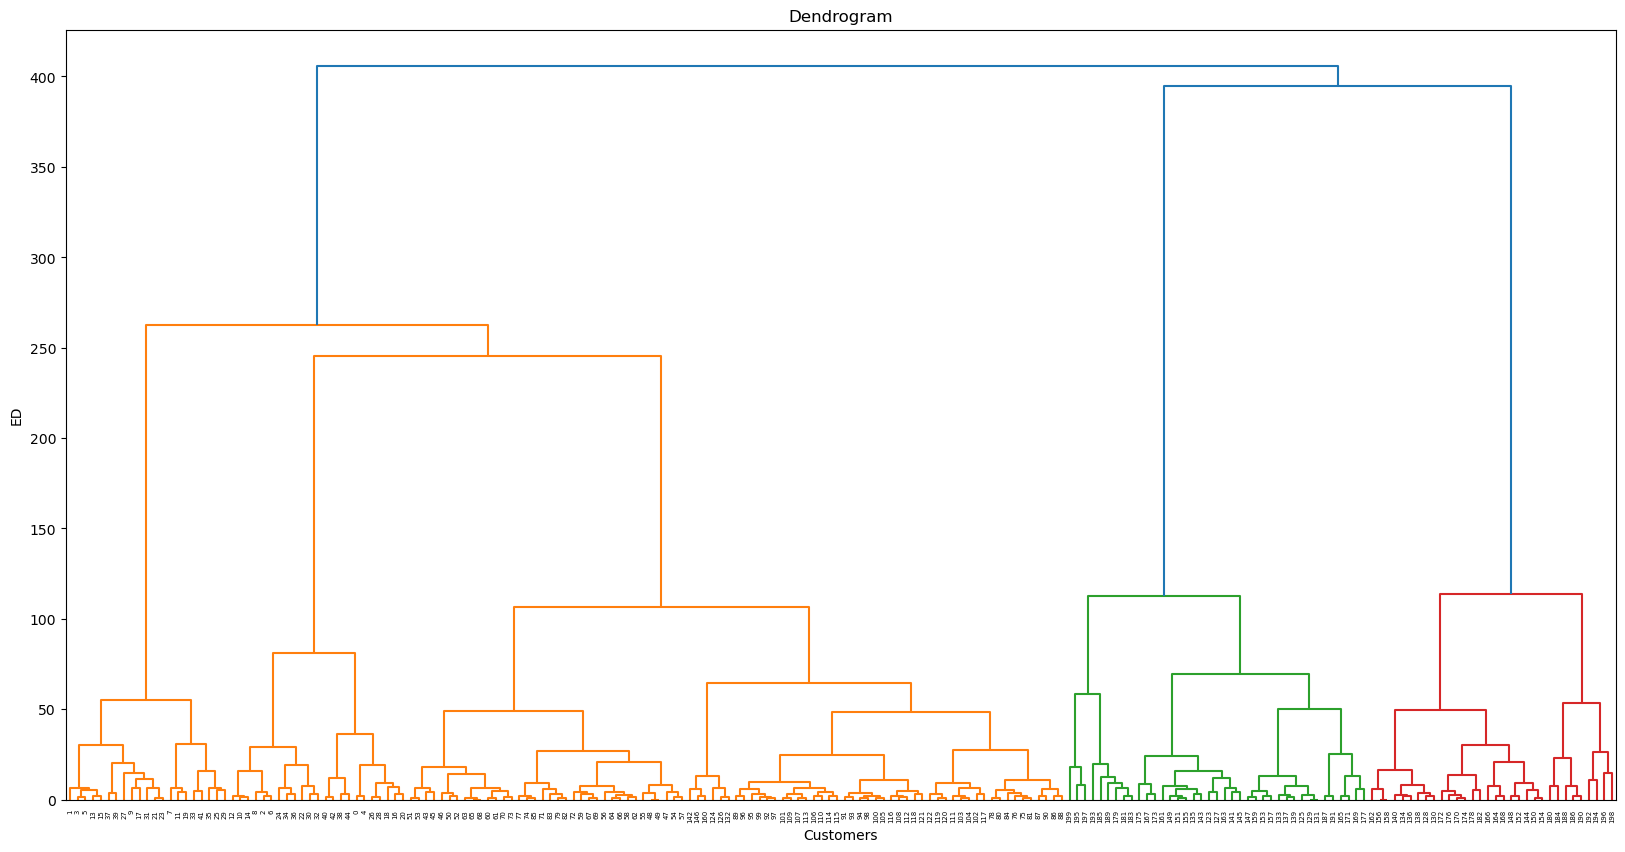

In [13]:
dend=dendrogram(linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram.png')
plt.show()

_**Finding the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Ward Method and predicting the dataset belonging to the cluster.**_

In [14]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc=hc.fit_predict(x)

_**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**_

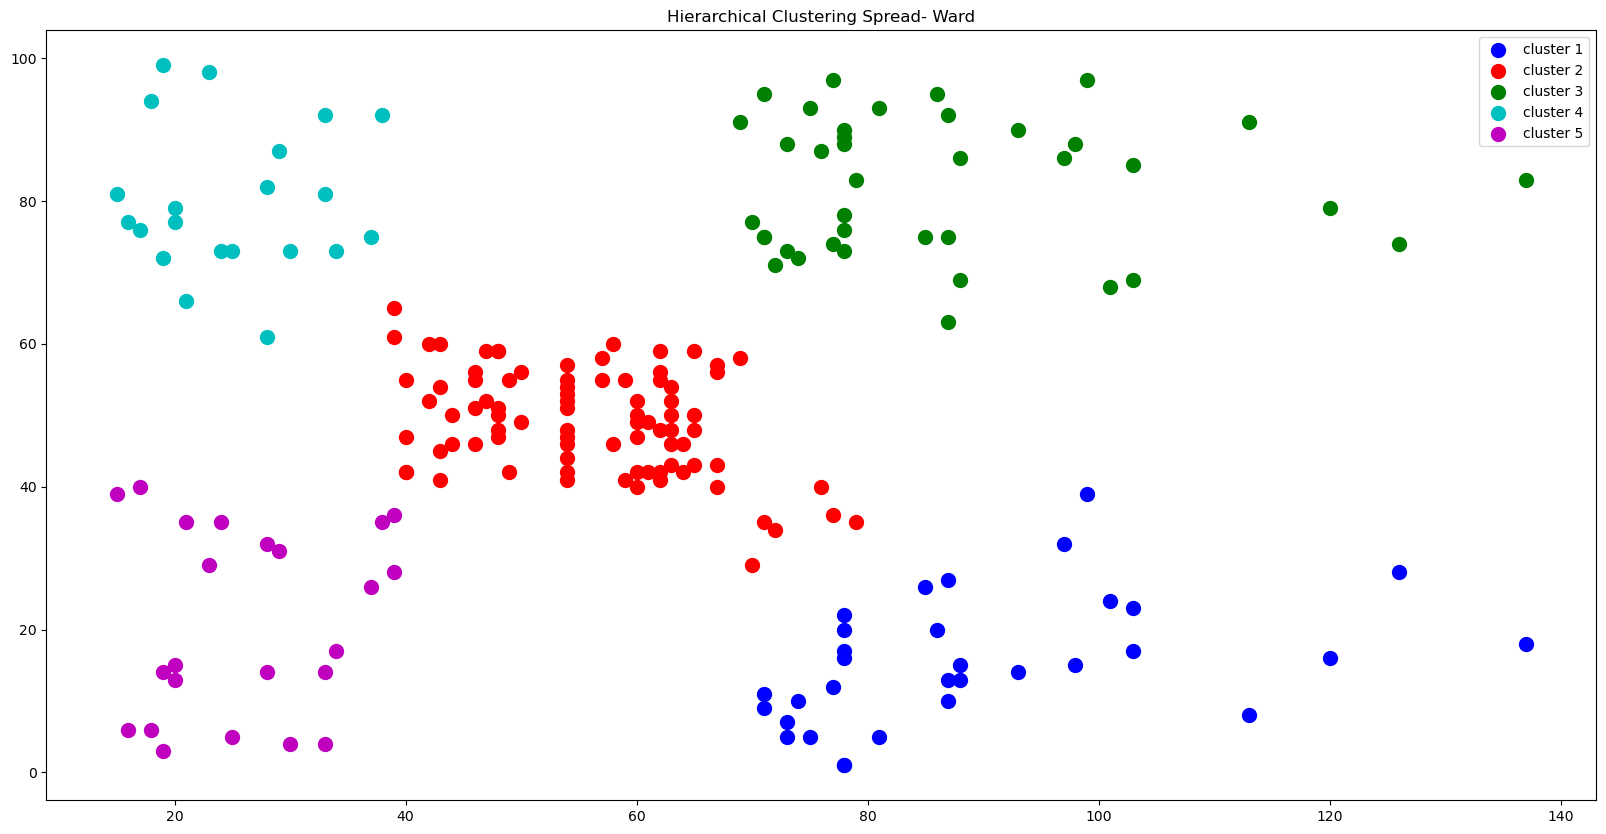

In [15]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=100,c='b',label='cluster 1')
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=100,c='r',label='cluster 2')
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=100,c='g',label='cluster 3')
plt.scatter(x[y_hc==3,0],x[y_hc==3,1],s=100,c='c',label='cluster 4')
plt.scatter(x[y_hc==4,0],x[y_hc==4,1],s=100,c='m',label='cluster 5')
plt.title('Hierarchical Clustering Spread- Ward')
plt.savefig('Hierarchical Clustering Spread- Ward.png')
plt.legend()
plt.show()

_**Merging the Cluster Number and adding the seperate column for it with Original Dataset and displaying the resulting dataset**_

In [16]:
result_hc_ward=pd.concat([df,pd.DataFrame(y_hc,columns=['Cluster Number'])],axis=1)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


_**Grouping By the clsuter number with respect to Annual Income and Spending to get the Minimum,Maximum values of Annual Income and Spending score and the number of values in each clusters.**_

In [17]:
result_hc_ward.groupby('Cluster Number').agg({'Annual Income (k$)':[np.max,np.min],'Spending Score (1-100)':[np.max,np.min,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amax amin                   amax amin size
Cluster Number                                                         
0                             137   71                     39    1   32
1                              79   39                     65   29   85
2                             137   69                     97   63   39
3                              38   15                     99   61   21
4                              39   15                     40    3   23

**_Plotting the Dendrogram Graph using Single Methods to find out the exact ideal number of clusters to be created using Agglomerative Clsutering model with Single Linkage and saving the PNG file._**

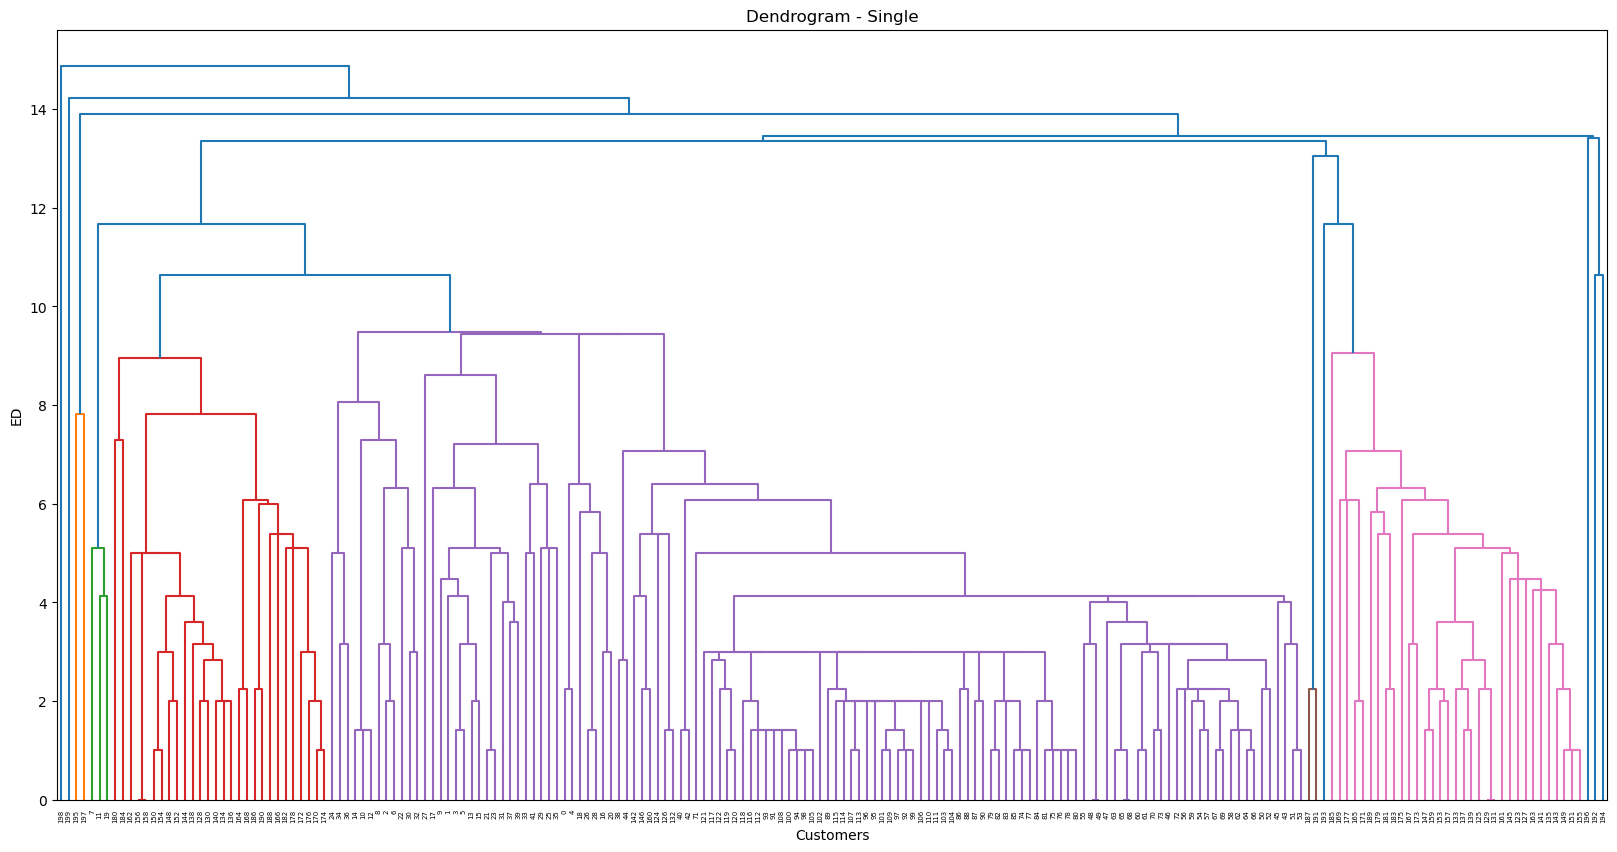

In [18]:
dend=dendrogram(linkage(x,method='single'))
plt.title('Dendrogram - Single')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram - Single.png')
plt.show()

_**Finding the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Single Method and predicting the dataset belonging to the cluster.**_

In [19]:
hc1=AgglomerativeClustering(n_clusters=7,linkage='single')
y_hc1=hc1.fit_predict(x)

_**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**_

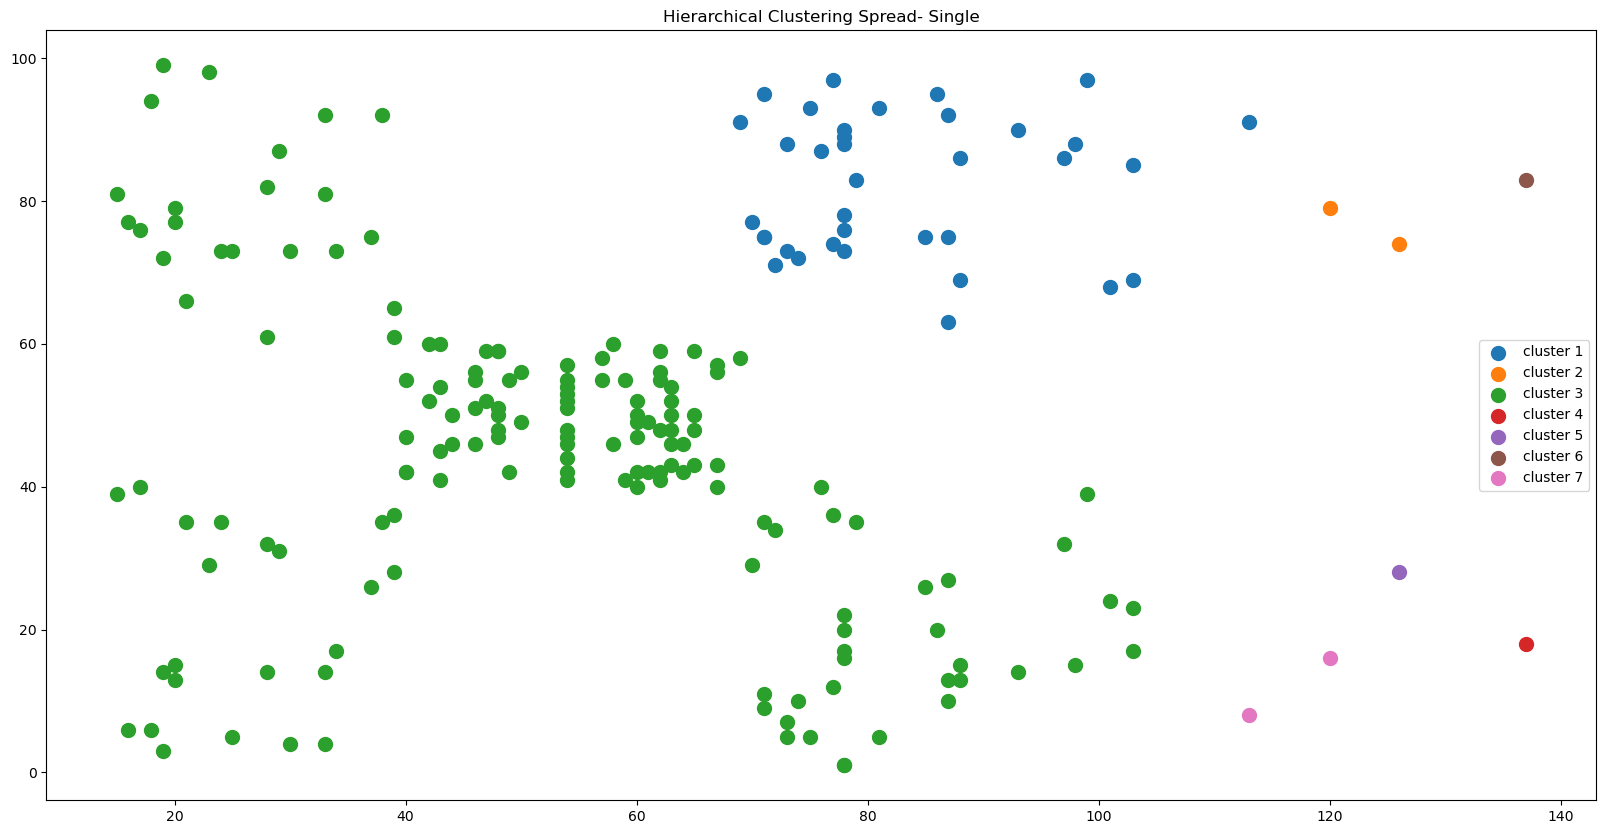

In [20]:
plt.scatter(x[y_hc1==0,0],x[y_hc1==0,1],s=100,label='cluster 1')
plt.scatter(x[y_hc1==1,0],x[y_hc1==1,1],s=100,label='cluster 2')
plt.scatter(x[y_hc1==2,0],x[y_hc1==2,1],s=100,label='cluster 3')
plt.scatter(x[y_hc1==3,0],x[y_hc1==3,1],s=100,label='cluster 4')
plt.scatter(x[y_hc1==4,0],x[y_hc1==4,1],s=100,label='cluster 5')
plt.scatter(x[y_hc1==5,0],x[y_hc1==5,1],s=100,label='cluster 6')
plt.scatter(x[y_hc1==6,0],x[y_hc1==6,1],s=100,label='cluster 7')
plt.title('Hierarchical Clustering Spread- Single')
plt.savefig('Hierarchical Clustering Spread- Single.png')
plt.legend()
plt.show()

_**Merging the Cluster Number and adding the seperate column for it with Original Dataset and displaying the resulting dataset**_

In [21]:
result_hc1_single=pd.concat([df,pd.DataFrame(y_hc1,columns=['Cluster Number'])],axis=1)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


_**Grouping By the clsuter number with respect to Annual Income and Spending to get the Minimum,Maximum values of Annual Income and Spending score and the number of values in each clusters.**_

In [22]:
result_hc1_single.groupby('Cluster Number').agg({'Annual Income (k$)':[np.max,np.min],'Spending Score (1-100)':[np.max,np.min,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amax amin                   amax amin size
Cluster Number                                                         
0                             113   69                     97   63   36
1                             126  120                     79   74    2
2                             103   15                     99    1  157
3                             137  137                     18   18    1
4                             126  126                     28   28    1
5                             137  137                     83   83    1
6                             120  113                     16    8    2

**_Plotting the Dendrogram Graph using Complete Methods to find out the exact ideal number of clusters to be created using Agglomerative Clsutering model with Complete Linkage and saving the PNG file._**

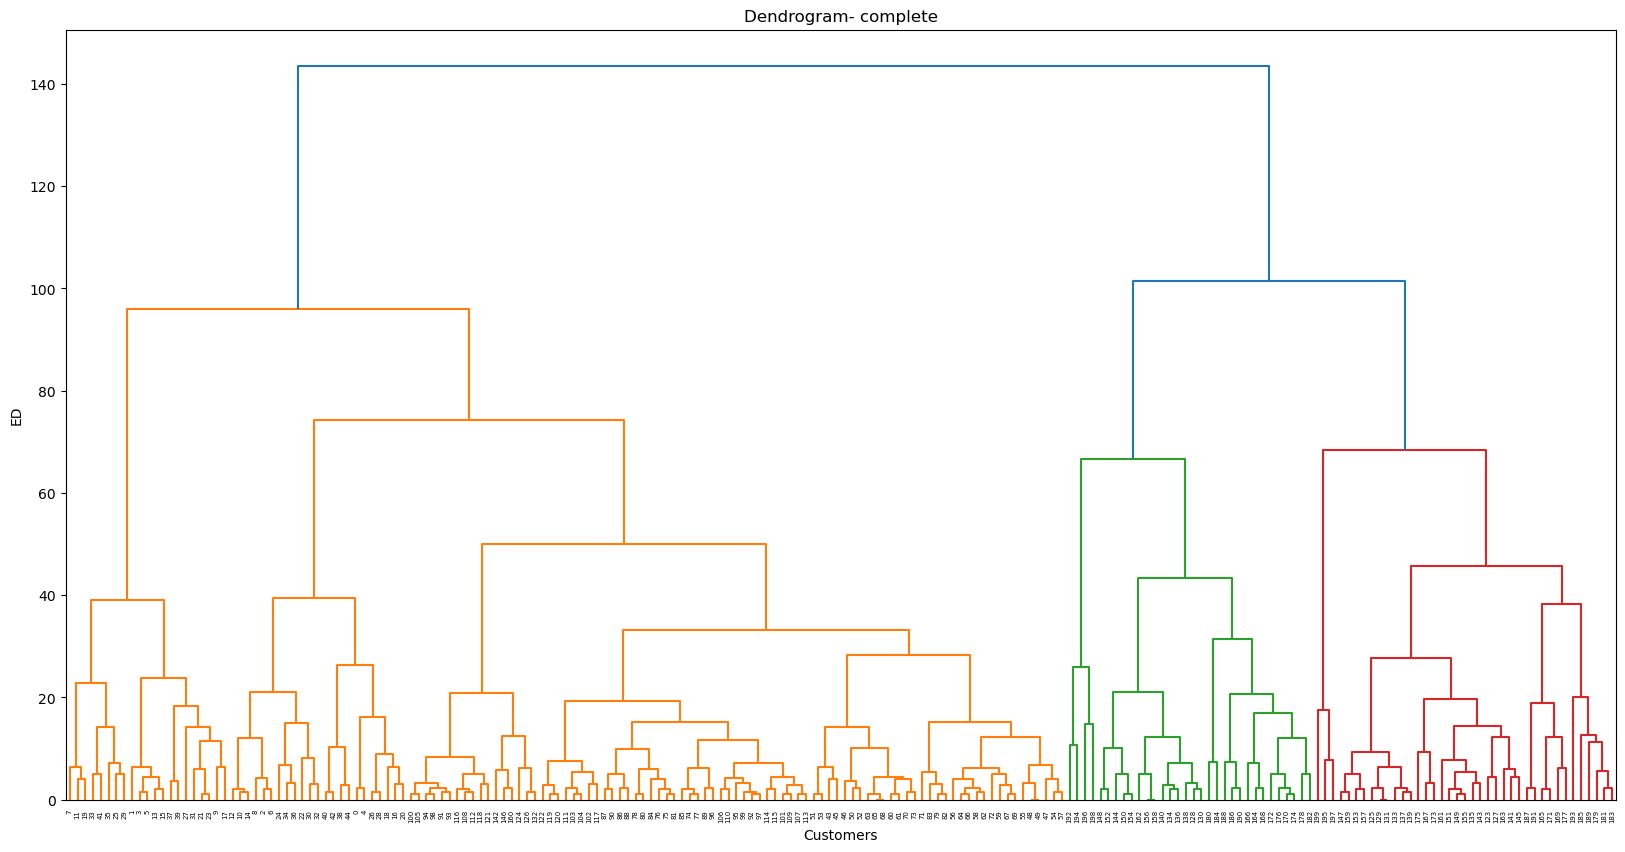

In [23]:
dend=dendrogram(linkage(x,method='complete'))
plt.title('Dendrogram- complete')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram - complete.png')
plt.show()

_**Finding the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using complete Method and predicting the dataset belonging to the cluster.**_

In [24]:
hc2=AgglomerativeClustering(n_clusters=5,linkage='complete')
y_hc2=hc2.fit_predict(x)

_**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**_

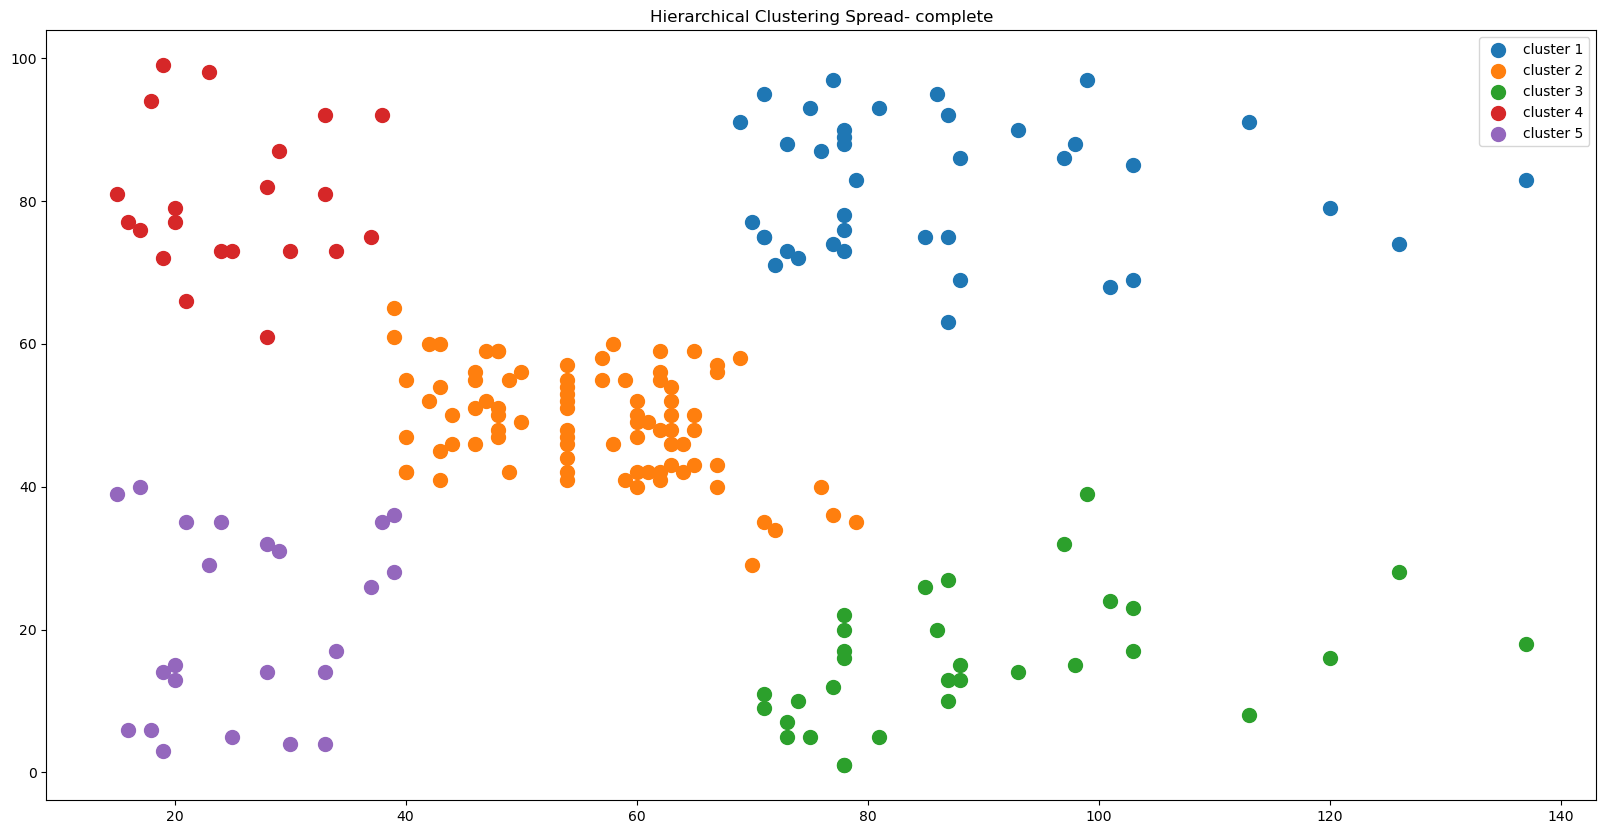

In [25]:
plt.scatter(x[y_hc2==0,0],x[y_hc2==0,1],s=100,label='cluster 1')
plt.scatter(x[y_hc2==1,0],x[y_hc2==1,1],s=100,label='cluster 2')
plt.scatter(x[y_hc2==2,0],x[y_hc2==2,1],s=100,label='cluster 3')
plt.scatter(x[y_hc2==3,0],x[y_hc2==3,1],s=100,label='cluster 4')
plt.scatter(x[y_hc2==4,0],x[y_hc2==4,1],s=100,label='cluster 5')
plt.title('Hierarchical Clustering Spread- complete')
plt.savefig('Hierarchical Clustering Spread- complete.png')
plt.legend()
plt.show()

_**Merging the Cluster Number and adding the seperate column for it with Original Dataset and displaying the resulting dataset**_

In [26]:
result_hc2_complete=pd.concat([df,pd.DataFrame(y_hc2,columns=['Cluster Number'])],axis=1)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


_**Grouping By the clsuter number with respect to Annual Income and Spending to get the Minimum,Maximum values of Annual Income and Spending score and the number of values in each clusters.**_

In [27]:
result_hc1_single.groupby('Cluster Number').agg({'Annual Income (k$)':[np.max,np.min],'Spending Score (1-100)':[np.max,np.min,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amax amin                   amax amin size
Cluster Number                                                         
0                             113   69                     97   63   36
1                             126  120                     79   74    2
2                             103   15                     99    1  157
3                             137  137                     18   18    1
4                             126  126                     28   28    1
5                             137  137                     83   83    1
6                             120  113                     16    8    2

_**Plotting the Dendrogram Graph using Average Methods to find out the exact ideal number of clusters to be created using Agglomerative Clsutering model with Average Linkage and saving the PNG file.**_

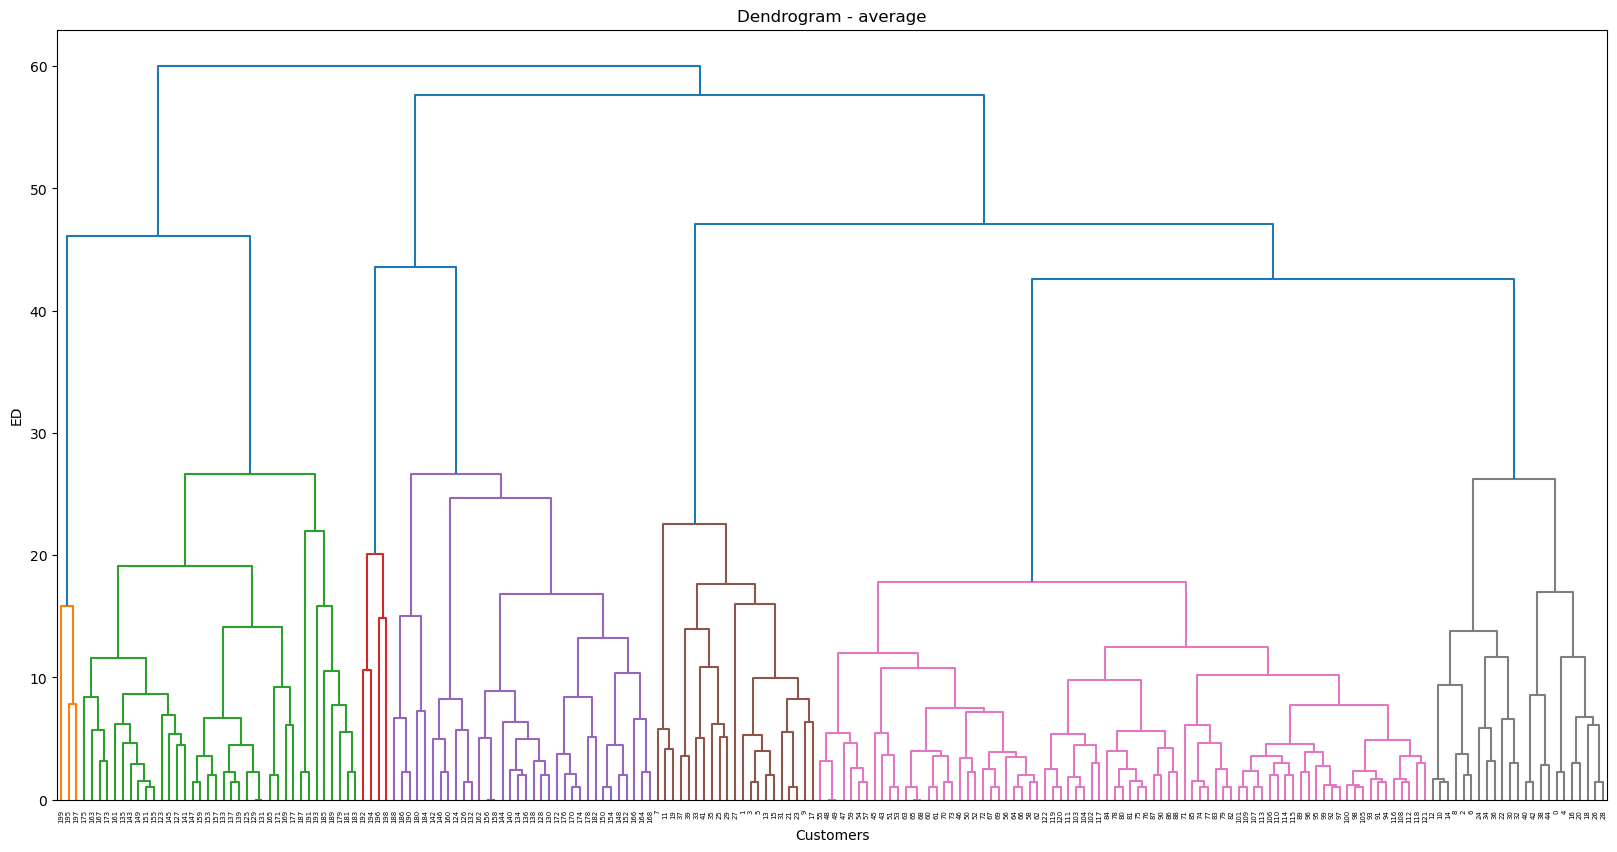

In [28]:
dend=dendrogram(linkage(x,method='average'))
plt.title('Dendrogram - average')
plt.xlabel('Customers')
plt.ylabel('ED')
plt.savefig('Dendrogram - average.png')
plt.show()

**_Finding the Agglomerative Clustering model with ideal number of clusters found from the Dendrogram using Average Method and predicting the dataset belonging to the cluster._**

In [29]:
hc3=AgglomerativeClustering(n_clusters=7,linkage='average')
y_hc3=hc3.fit_predict(x)

_**Plotting the Scatter plot Graph with the independent variable and the cluster which it belongs and saving the PNG file.**_

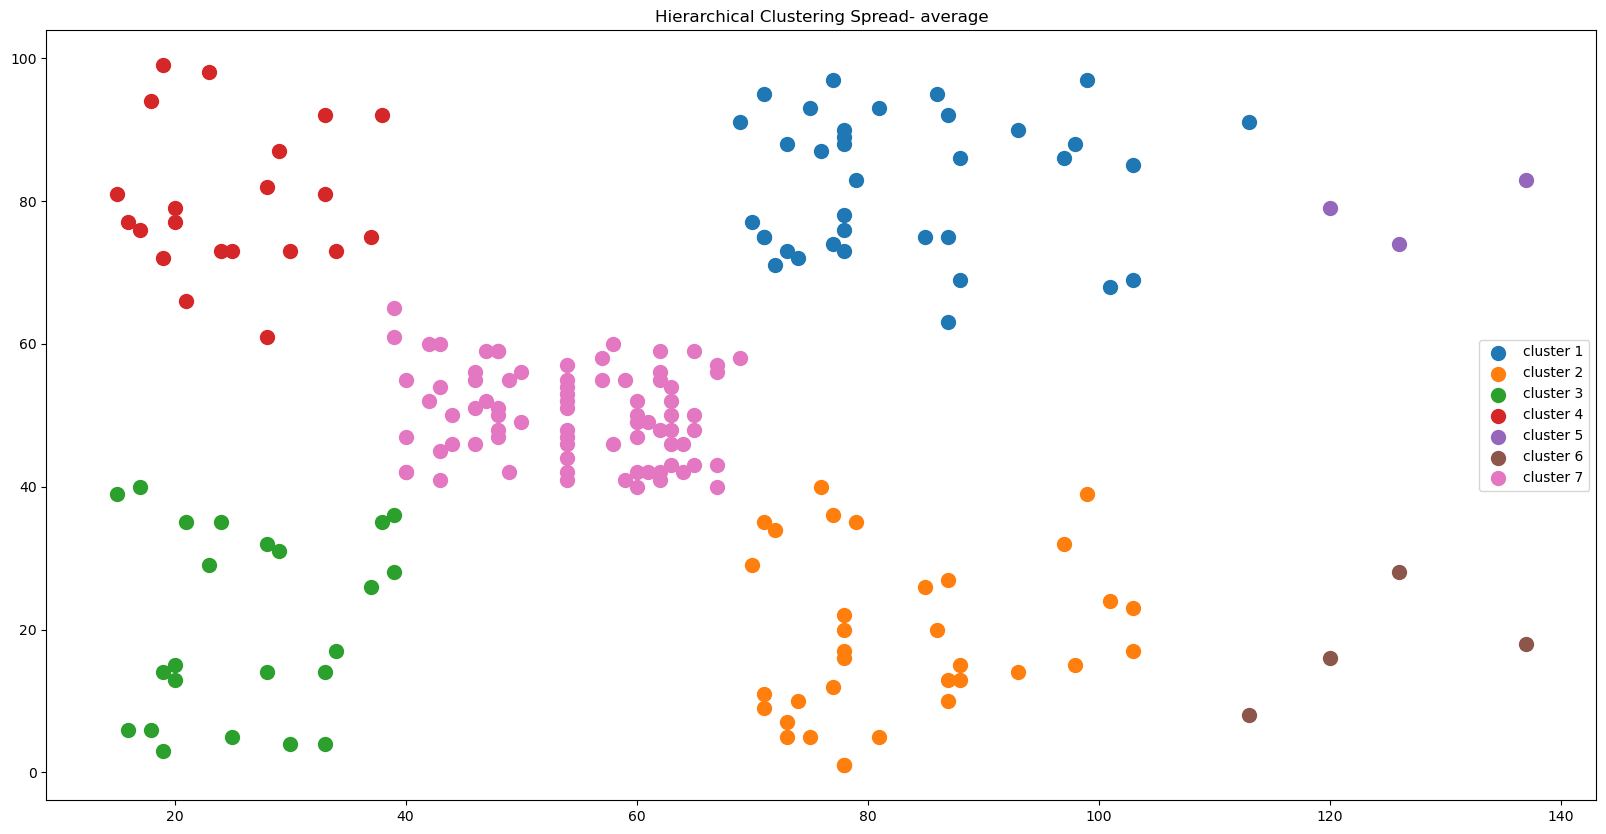

In [30]:
plt.scatter(x[y_hc3==0,0],x[y_hc3==0,1],s=100,label='cluster 1')
plt.scatter(x[y_hc3==1,0],x[y_hc3==1,1],s=100,label='cluster 2')
plt.scatter(x[y_hc3==2,0],x[y_hc3==2,1],s=100,label='cluster 3')
plt.scatter(x[y_hc3==3,0],x[y_hc3==3,1],s=100,label='cluster 4')
plt.scatter(x[y_hc3==4,0],x[y_hc3==4,1],s=100,label='cluster 5')
plt.scatter(x[y_hc3==5,0],x[y_hc3==5,1],s=100,label='cluster 6')
plt.scatter(x[y_hc3==6,0],x[y_hc3==6,1],s=100,label='cluster 7')
plt.title('Hierarchical Clustering Spread- average')
plt.savefig('Hierarchical Clustering Spread- average.png')
plt.legend()
plt.show()

_**Merging the Cluster Number and adding the seperate column for it with Original Dataset and displaying the resulting dataset**_

In [31]:
result_hc3_average=pd.concat([df,pd.DataFrame(y_hc3,columns=['Cluster Number'])],axis=1)
result

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster Number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,1
197,198,Male,32,126,74,2
198,199,Male,32,137,18,1


_**Grouping By the clsuter number with respect to Annual Income and Spending to get the Minimum,Maximum values of Annual Income and Spending score and the number of values in each clusters.**_

In [32]:
result_hc3_average.groupby('Cluster Number').agg({'Annual Income (k$)':[np.max,np.min],'Spending Score (1-100)':[np.max,np.min,np.size]})

Annual Income (k$)      Spending Score (1-100)          
                             amax amin                   amax amin size
Cluster Number                                                         
0                             113   69                     97   63   36
1                             103   70                     40    1   34
2                              39   15                     40    3   23
3                              38   15                     99   61   21
4                             137  120                     83   74    3
5                             137  113                     28    8    4
6                              69   39                     65   40   79